#Implications of Sub-Sampling of Signals

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.fftpack 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


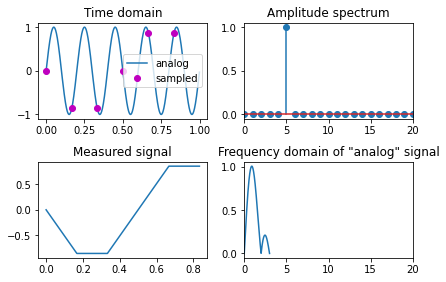

In [4]:
# simulation params
srate  = 1000
time   = np.arange(0,1,1/srate)
npnts  = len(time)
signal = np.sin(2*np.pi*5*time)


# measurement parameters
msrate = 6 # hz
mtime  = np.arange(0,1,1/msrate)
midx   = np.zeros(len(mtime),dtype=int)
for i in range(0,len(midx)):
    midx[i] = np.argmin(np.abs(time-mtime[i]))


# plot the time-domain signals
plt.subplot2grid((2,2), (0,0))
plt.plot(time,signal,label='analog')
plt.plot(time[midx],signal[midx],'mo',label='sampled')
plt.title('Time domain')
plt.legend()


# plot the power spectrum of the "analog" signal
plt.subplot2grid((2,2),(0,1))
sigX = 2*np.abs(scipy.fftpack.fft(signal,npnts)/npnts)
hz   = np.linspace(0,srate/2,int(np.floor(npnts/2)+1))
plt.stem(hz,sigX[0:len(hz)])
plt.xlim([0,20])
plt.title('Amplitude spectrum')


# now plot only the measured signal
plt.subplot2grid((2,2),(1,0))
plt.plot(time[midx],signal[midx])
plt.title('Measured signal')

# and its amplitude spectrum
plt.subplot2grid((2,2),(1,1))
sigX = 2*np.abs(scipy.fftpack.fft(signal[midx],npnts)/len(midx))
hz   = np.linspace(0,msrate/2,int(np.floor(npnts/2)+1))

plt.plot(hz,sigX[0:len(hz)])
plt.tight_layout(pad=1)
plt.xlim([0,20])
plt.title('Frequency domain of "analog" signal')
plt.show()

The reconstructed signal is not at all an accurate reresentation of the original signal.

The amplitude spectrum is total different. This shows high energy at 1Hz & another bump at 2Hz and nothing at 5Hz (while our signal haas 5Hz Amplitude).

Reason: This signal is fluctuating at five Hz whereas the sampling rate is 6Hz. So the Nyquist frequency is 3Hz. In other words, this time domain signal is fluctuating faster than the Nyquist frequency. Thus, this phenomenon is known as Aliasing.[Not desired]

What happens when we sample the signal at 10 Hz ?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


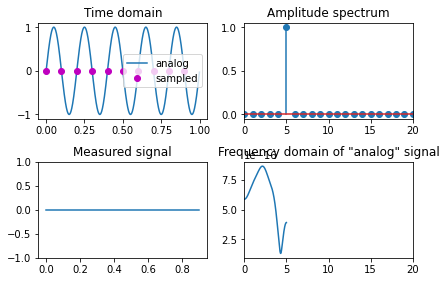

In [8]:
# simulation params
srate  = 1000
time   = np.arange(0,1,1/srate)
npnts  = len(time)
signal = np.sin(2*np.pi*5*time)


# measurement parameters
msrate = 10 # hz
mtime  = np.arange(0,1,1/msrate)
midx   = np.zeros(len(mtime),dtype=int)
for i in range(0,len(midx)):
    midx[i] = np.argmin(np.abs(time-mtime[i]))


# plot the time-domain signals
plt.subplot2grid((2,2), (0,0))
plt.plot(time,signal,label='analog')
plt.plot(time[midx],signal[midx],'mo',label='sampled')
plt.title('Time domain')
plt.legend()


# plot the power spectrum of the "analog" signal
plt.subplot2grid((2,2),(0,1))
sigX = 2*np.abs(scipy.fftpack.fft(signal,npnts)/npnts)
hz   = np.linspace(0,srate/2,int(np.floor(npnts/2)+1))
plt.stem(hz,sigX[0:len(hz)])
plt.xlim([0,20])
plt.title('Amplitude spectrum')


# now plot only the measured signal
plt.subplot2grid((2,2),(1,0))
plt.plot(time[midx],signal[midx])
plt.ylim([-1, 1])
plt.title('Measured signal')

# and its amplitude spectrum
plt.subplot2grid((2,2),(1,1))
sigX = 2*np.abs(scipy.fftpack.fft(signal[midx],npnts)/len(midx))
hz   = np.linspace(0,msrate/2,int(np.floor(npnts/2)+1))

plt.plot(hz,sigX[0:len(hz)])
plt.tight_layout(pad=1)
plt.xlim([0,20])
plt.title('Frequency domain of "analog" signal')
plt.show()

The value at 'frequency domain analog signal' graph is basically 0. 

Thus, sampling just at twice per cycle is likely to give bad results.

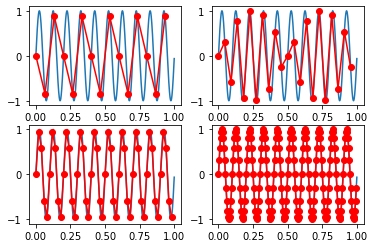

In [9]:
#getting close to the Nyquist

# subsample a high-sampling rate sine wave (pretend it's a continuous wave)
srate = 1000
t = np.arange(0,1,1/srate)
f = 10 # frequency of the sine wave Hz
d = np.sin(2*np.pi*f*t)


# "Measurement" sampling rates
srates = [15, 22, 50, 200] # in Hz

for si in range(0,4):
    
    # find the right subplot
    loc = np.unravel_index(si,[2,2],'F')
    plt.subplot2grid((2,2),(loc[1],loc[0]))
    
    # plot 'continuous' sine wave
    plt.plot(t,d)
    
    # plot sampled sine wave
    samples = np.arange(0,len(t),1000/srates[si])
    samples = list( map(int,samples) )
    plt.plot(t[samples],d[samples],'ro-')

plt.show()